In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3 # 91 %
from tensorflow.keras.applications import ResNet50 # 20 %
from tensorflow.keras.applications import VGG16 # 52 %
from tensorflow.keras import layers, models

In [2]:
base_model = InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze/Unfreeze the base model (to use pre-trained features)
base_model.trainable = True
for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from keras.optimizers import Adam
from keras.optimizers import SGD

# Build model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

# optimizer=Adam
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [4]:
DATA_DIR = '/kaggle/input/og-sampah/Sorted_dataset'

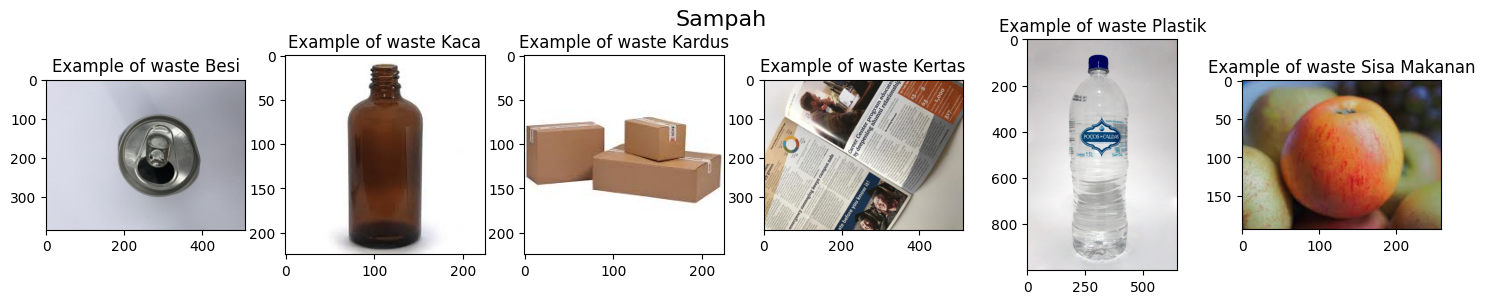

In [5]:
fig, axes = plt.subplots(1, 6, figsize=(18, 3))
fig.suptitle('Sampah', fontsize=16)

# Plot one image from the first 6 waste
for ii, waste in enumerate(['Besi' , 'Kaca', 'Kardus', 'Kertas', 'Plastik', 'Sisa Makanan']):
    dir = f'/kaggle/input/og-sampah/Sorted_dataset/{waste}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example of waste {waste}')

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load dataset (contoh untuk image data)
data_gen = ImageDataGenerator(rescale=1./255)
data_flow = data_gen.flow_from_directory(
    directory=DATA_DIR,
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

# Ekstraksi data dan label dari generator
data, labels = [], []
for i in range(len(data_flow)):
    x, y = data_flow[i]
    data.extend(x)
    labels.extend(y)
data = np.array(data)
labels = np.array(labels)

# Membagi dataset menjadi train dan validation
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=np.argmax(labels, axis=1)
)

Found 1247 images belonging to 6 classes.


In [7]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16
)

Epoch 1/50


I0000 00:00:1732361800.907161     153 service.cc:145] XLA service 0x79a520098160 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732361800.907218     153 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732361800.907221     153 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 3/63 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1944 - loss: 2.5331 

I0000 00:00:1732361810.881902     153 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 319ms/step - accuracy: 0.3979 - loss: 1.8307 - val_accuracy: 0.8040 - val_loss: 0.4934
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7196 - loss: 0.7687 - val_accuracy: 0.9000 - val_loss: 0.3204
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8130 - loss: 0.5591 - val_accuracy: 0.9120 - val_loss: 0.2405
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8162 - loss: 0.5150 - val_accuracy: 0.9320 - val_loss: 0.2209
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8603 - loss: 0.4245 - val_accuracy: 0.9320 - val_loss: 0.2052
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8669 - loss: 0.3580 - val_accuracy: 0.9400 - val_loss: 0.1955
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9000 - loss: 0.3073 - val_accuracy: 0.9360 - val_loss: 0.1865
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8845 - loss: 0.3350 - val_accuracy: 0.9280 - val_loss: 

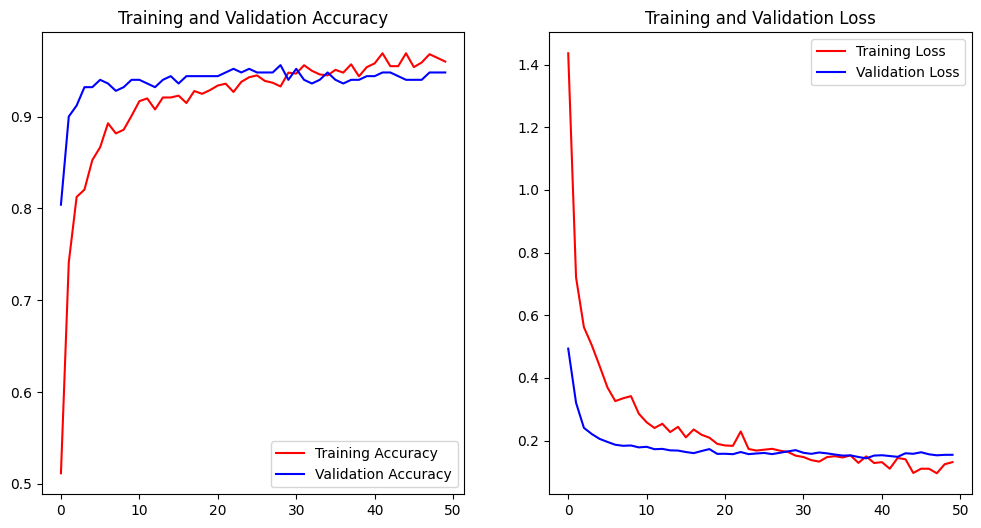

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


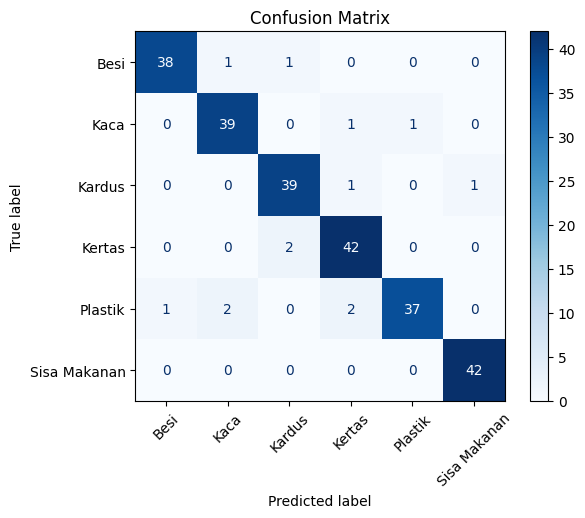

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prediksi data validation
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Membuat confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data_flow.class_indices.keys())
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


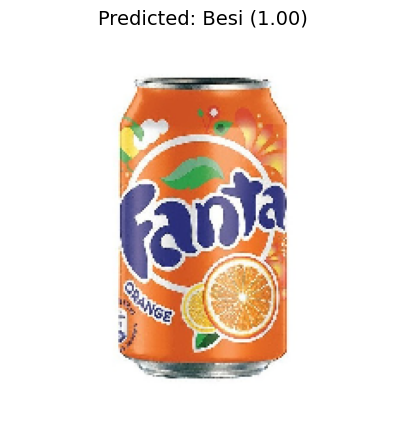

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf

# Fungsi untuk prediksi satu gambar dan menampilkan hasil
def predict_and_display(model, img_path, target_size, class_names):
    # Load gambar
    img = image.load_img(img_path, target_size=target_size)
    
    # Preprocessing: Ubah menjadi array dan normalisasi
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    img_array /= 255.0  # Normalisasi (sesuai preprocessing saat training)
    
    # Prediksi
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])  # Indeks kelas prediksi tertinggi
    
    # Plot gambar input dan label prediksi
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')  # Hilangkan sumbu
    plt.title(f"Predicted: {class_names[predicted_class]} ({predictions[0][predicted_class]:.2f})", fontsize=14)
    plt.show()

# Contoh pemanggilan fungsi
image_path = "/kaggle/input/sampahio/sampahIO_fix/validation/Besi/metal_1447.jpg"  # Path ke gambar yang ingin diprediksi
target_size = (224, 224)  # Ukuran input model
class_names = ['Besi' , 'Kaca', 'Kardus', 'Kertas', 'Plastik', 'Sisa Makanan']  # Sesuaikan label

predict_and_display(model, image_path, target_size, class_names)

In [16]:
import joblib

# Simpan model
joblib.dump(model, 'model_inceptionv3.joblib')
print("Model berhasil disimpan sebagai 'model_inceptionv3.joblib'")

Model berhasil disimpan sebagai 'model_inceptionv3.joblib'
